In [204]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot')

In [205]:
df = pd.read_csv('D207_metrics.tsv', index_col=[1], skipinitialspace=True, sep='\t')
df

,min_instances,shannon_diversity,clonality,pielous_evenness,simpson_index,richness
metric,,,,,,
instance,1,11.371217,3244.302286,0.961476,0.000308,136876
total,1,11.062577,6094.346703,0.935380,0.000164,136876
unique,1,11.610171,28038.588272,0.981681,0.000036,136876
instance,2,9.907315,904.752198,0.948340,0.001105,34441
total,2,9.823869,1854.025363,0.940353,0.000539,34441
unique,2,10.205621,6543.306956,0.976895,0.000153,34441
instance,3,8.759802,341.921872,0.929226,0.002925,12419
total,3,8.800880,685.085815,0.933584,0.001460,12419
unique,3,9.131202,2069.605574,0.968624,0.000483,12419


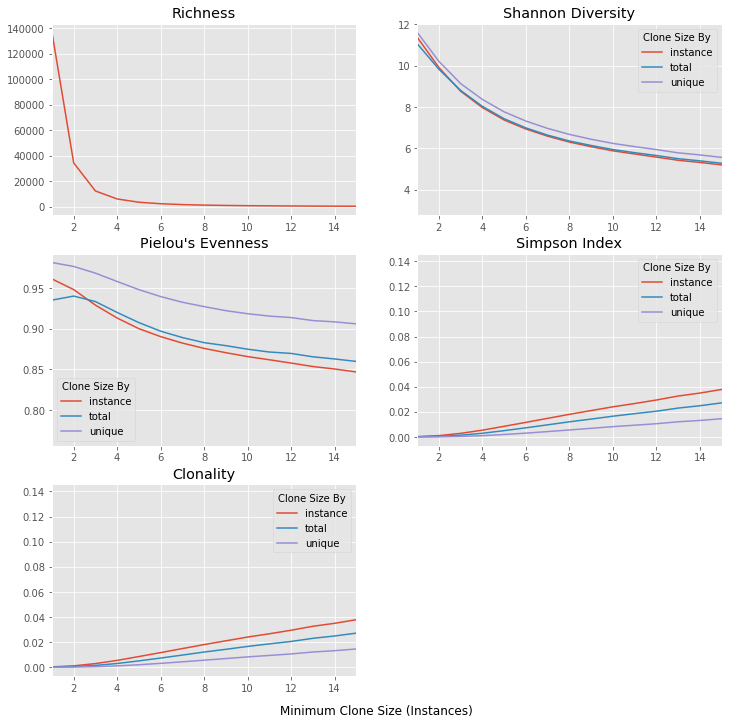

In [223]:
def plot_metric(metric, ax, limit=None):
    rax = df[['min_instances', metric]].reset_index().pivot(
        columns='metric', values=metric, index='min_instances')
    if limit:
        rax = rax[[limit]]
    rax = rax.plot.line(ax=ax)
    rax.set_xlabel('')
    rax.legend(title='Clone Size By')
    ax.set_xlim((1, 15))
    return rax

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

ax = plot_metric('richness', axes[0, 0], 'instance')
ax.set_title('Richness')
ax.legend_.remove()

ax = plot_metric('shannon_diversity', axes[0, 1])
ax.set_title('Shannon Diversity')

ax = plot_metric('pielous_evenness', axes[1, 0])
ax.set_title('Pielou\'s Evenness')

ax = plot_metric('simpson_index', axes[1, 1])
ax.set_title('Simpson Index')

ax = plot_metric('simpson_index', axes[2, 0])
ax.set_title('Clonality')

fig.text(0.5, 0.08, 'Minimum Clone Size (Instances)', ha='center', fontsize=12)

axes[2, 1].remove()

plt.savefig('D207_various_metrics.pdf', bbox_inches='tight')